<a href="https://colab.research.google.com/github/mojassameh/Kaggle/blob/master/Kaggle_predict_future_sale_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# from zipfile import ZipFile
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


#Reading the data

In [94]:
items = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/items.csv')
print(items.shape)
print(items.isna().sum())
print(items.head().T)

(22170, 3)
item_name           0
item_id             0
item_category_id    0
dtype: int64
                                                          0  ...                                            4
item_name         ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D  ...  ***КОРОБКА (СТЕКЛО)                       D
item_id                                                   0  ...                                            4
item_category_id                                         40  ...                                           40

[3 rows x 5 columns]


In [95]:
shops = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/shops.csv')
print(shops.shape)
print(shops.isna().sum())
print(shops.head().T)

(60, 2)
shop_name    0
shop_id      0
dtype: int64
                                       0  ...                         4
shop_name  !Якутск Орджоникидзе, 56 фран  ...  Волжский ТЦ "Волга Молл"
shop_id                                0  ...                         4

[2 rows x 5 columns]


In [96]:
items_cat = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/item_categories.csv')
print(items_cat.shape)
print(items_cat.isna().sum())
print(items_cat.head().T)

(84, 2)
item_category_name    0
item_category_id      0
dtype: int64
                                          0  ...                 4
item_category_name  PC - Гарнитуры/Наушники  ...  Аксессуары - PSP
item_category_id                          0  ...                 4

[2 rows x 5 columns]


In [97]:
sales_train = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/sales_train.csv')
print(sales_train.shape)
print(sales_train.isna().sum())
print(sales_train.head().T)

(2935849, 6)
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
                         0           1           2           3           4
date            02.01.2013  03.01.2013  05.01.2013  06.01.2013  15.01.2013
date_block_num           0           0           0           0           0
shop_id                 59          25          25          25          25
item_id              22154        2552        2552        2554        2555
item_price             999         899         899     1709.05        1099
item_cnt_day             1           1          -1           1           1


In [98]:
test = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/test.csv')
print(test.shape)
print(test.isna().sum())
print(test.head().T)

(214200, 3)
ID         0
shop_id    0
item_id    0
dtype: int64
            0     1     2     3     4
ID          0     1     2     3     4
shop_id     5     5     5     5     5
item_id  5037  5320  5233  5232  5268


In [187]:
submission = pd.read_csv('/content/drive/My Drive/colab/kaggle_future_sale/sample_submission.csv')
print(submission.shape)
print(submission.isna().sum())
print(submission.head().T)

(214200, 2)
ID                0
item_cnt_month    0
dtype: int64
                  0    1    2    3    4
ID              0.0  1.0  2.0  3.0  4.0
item_cnt_month  0.5  0.5  0.5  0.5  0.5


# Outliers removal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1dc6f1a58>,
      dtype=object)

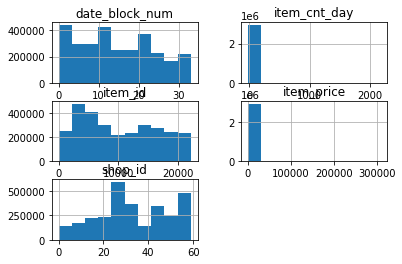

In [100]:
sales_train.hist()

In [0]:
min_sales= sales_train[sales_train['item_cnt_day']<0].index

In [0]:
sales_train.drop(min_sales,axis=0,inplace=True)

In [0]:
max_sales = sales_train[sales_train['item_cnt_day']>20].index

In [0]:
sales_train.drop(max_sales,axis=0,inplace=True)

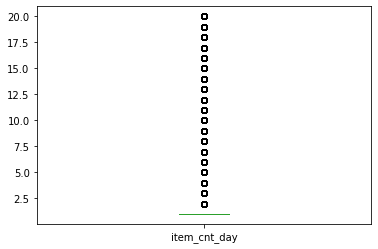

In [105]:
sales_train['item_cnt_day'].plot.box()

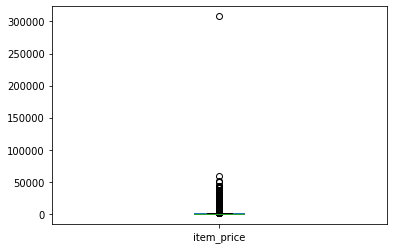

In [106]:
sales_train['item_price'].plot.box()

In [107]:
min_price= sales_train[sales_train['item_price']<=0].index
print(len(min_price))

1


In [0]:
sales_train.drop(min_price,axis=0,inplace=True)

In [109]:
max_price=sales_train[sales_train['item_price']>3000].index
print(len(max_price))

90037


In [0]:
sales_train.drop(max_price,axis=0,inplace=True)

In [111]:
sales_train.shape

(2835041, 6)

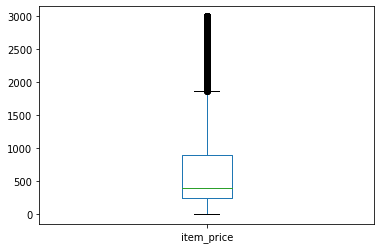

In [112]:
sales_train['item_price'].plot.box()

# Data aggregation

In [113]:
sales_train_month=sales_train.groupby(['date_block_num','shop_id','item_id'],as_index=False).agg({'item_price':['mean'],'item_cnt_day':['sum']})
sales_train_month.columns =['date_block_num','shop_id','item_id','item_price_mean','item_count_month']
print(sales_train_month.shape)
print(sales_train_month.isna().sum())
print(sales_train_month.head())

(1565778, 5)
date_block_num      0
shop_id             0
item_id             0
item_price_mean     0
item_count_month    0
dtype: int64
   date_block_num  shop_id  item_id  item_price_mean  item_count_month
0               0        0       32            221.0               6.0
1               0        0       33            347.0               3.0
2               0        0       35            247.0               1.0
3               0        0       43            221.0               1.0
4               0        0       51            128.5               2.0


In [114]:
sales_train_month['item_count_month'].mean()

2.1691114576906814

In [115]:
test['date_block_num']=34
test.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [0]:
# pd.DataFrame(test['item_id']).merge(sales_train_month[['item_id','item_price_mean']].groupby(['item_id'],as_index=False).agg({'item_price_mean':['mean']}),how='left',on=['item_id'])

In [0]:
# test['item_price_mean'] = np.nan
# df_left = pd.DataFrame(test['item_id'])
# df_right = sales_train_month[['item_id','item_price_mean']].groupby(['item_id'],as_index=False).agg({'item_price_mean':['mean']})
# df_right.columns=['item_id','item_price_mean']
# test['item_price_mean'] =df_left.merge(df_right,on=['item_id'],how='left')['item_price_mean']

In [0]:
# test['item_price_mean'].isna().sum()
# test['item_price_mean'].fillna(test['item_price_mean'].median(),inplace=True)

In [0]:
# test['item_price_mean'].isna().sum()

In [0]:
# from google.colab import files
# submission.to_csv('submission_108.csv',sep=',',index=False) 
# files.download('submission_108.csv')

In [121]:
sales_train_month.head().T

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,32.0,33.0,35.0,43.0,51.0
item_price_mean,221.0,347.0,247.0,221.0,128.5
item_count_month,6.0,3.0,1.0,1.0,2.0


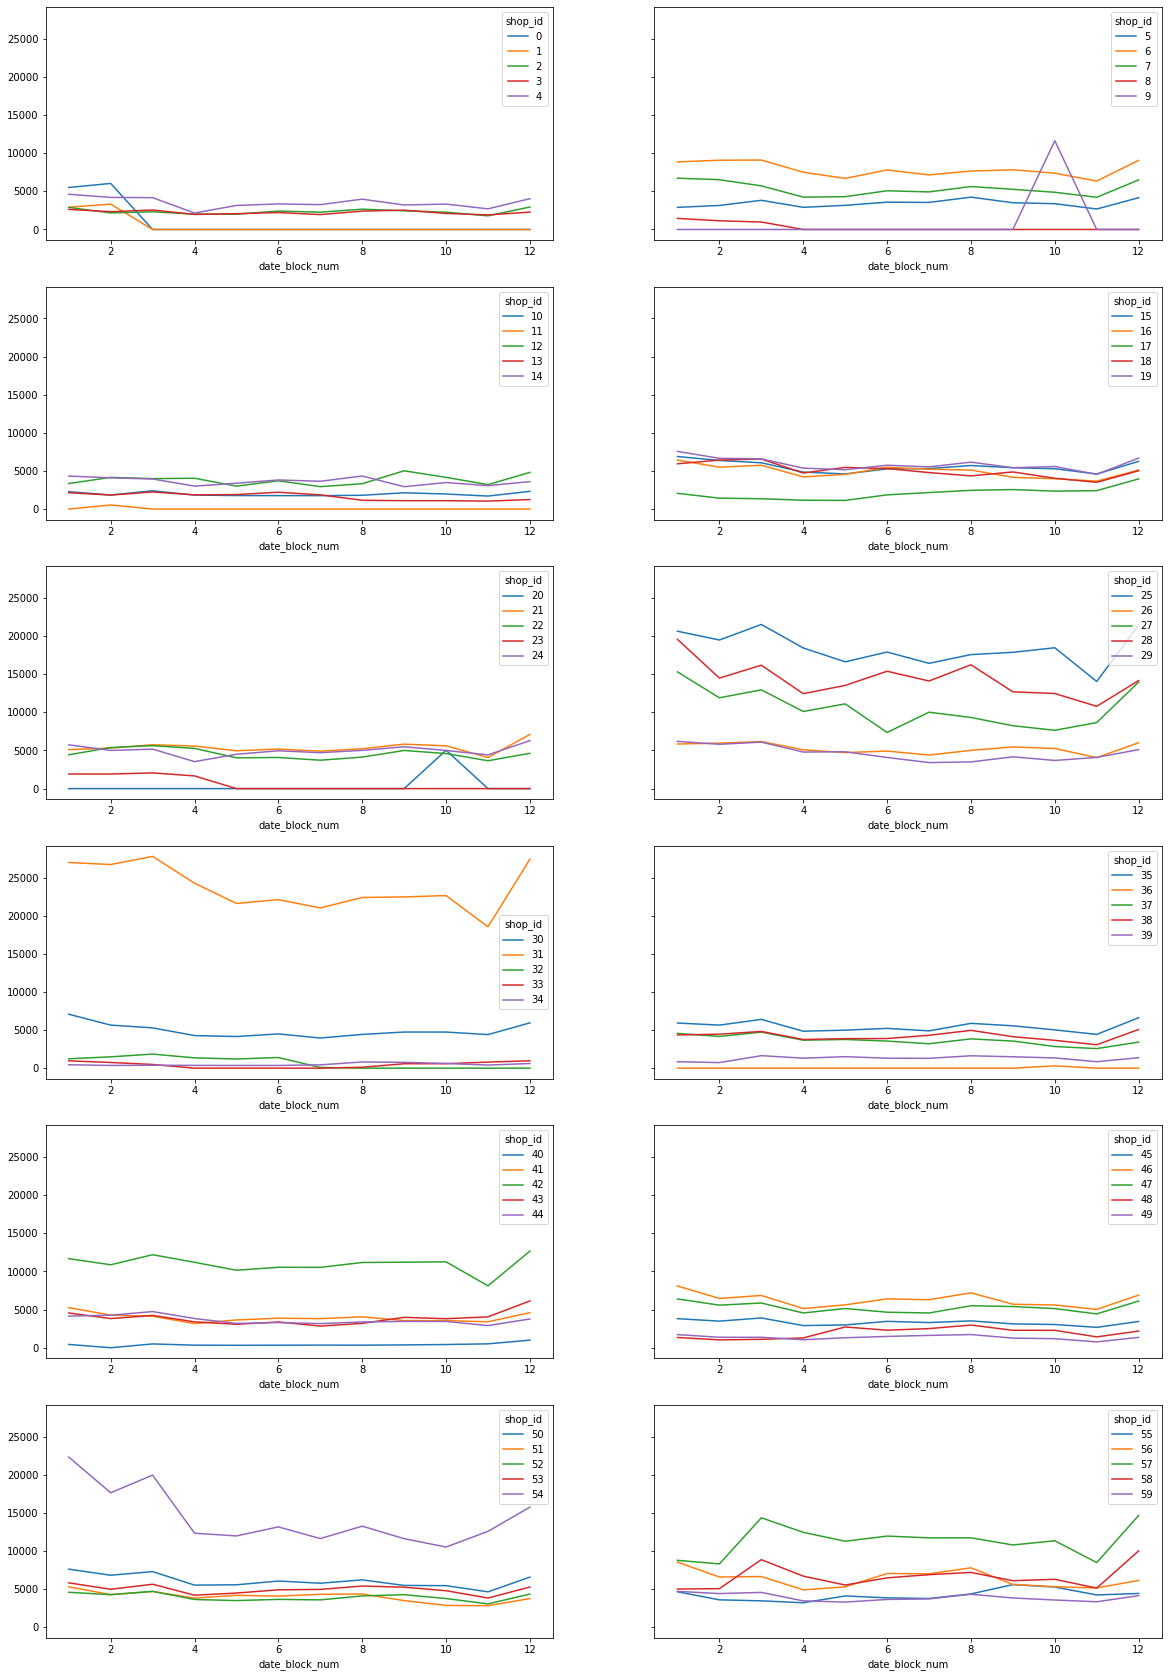

In [122]:
sales_train_month_copy = sales_train_month.copy() # a copy of our df
sales_train_month_copy['date_block_num']=(sales_train_month_copy['date_block_num'] %12)+1 # translate to the natural 12 months
fig, ax = plt.subplots(sharex=False,sharey=True,figsize=(20,30),ncols=2,nrows=6) #subplottinh
counter =0
for i in range(6):
  for j in range(2):
    tmp_df = sales_train_month_copy.groupby(['date_block_num','shop_id'],as_index=False).agg({'item_count_month':['sum']})
    tmp_df.columns=['date_block_num','shop_id','item_count_month']
    tmp_df =tmp_df.query('shop_id >= '+str(counter)+ ' and shop_id <'+str(counter+5))
    counter += 5
    tmp_df_pv =tmp_df.pivot(index='date_block_num',values='item_count_month',columns='shop_id')
    tmp_df_pv.fillna(0,inplace=True)
    tmp_df_pv.plot(ax=ax[i][j])

In [0]:
sales_train_month['month']=(sales_train_month['date_block_num']%12)+1

In [124]:
tmp_df= sales_train_month.groupby(['shop_id','month'],as_index=False).agg({'item_count_month':['sum']})
tmp_df.columns=['shop_id','month','sum_sales_month_shop']
tmp_df.head().T

,0,1,2,3,4
shop_id,0.0,0.0,1.0,1.0,2.0
month,1.0,2.0,1.0,2.0,1.0
sum_sales_month_shop,5511.0,6041.0,2919.0,3325.0,2894.0


In [125]:
sales_train_month =sales_train_month.merge(tmp_df,how='left')
sales_train_month.head().T

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,32.0,33.0,35.0,43.0,51.0
item_price_mean,221.0,347.0,247.0,221.0,128.5
item_count_month,6.0,3.0,1.0,1.0,2.0
month,1.0,1.0,1.0,1.0,1.0
sum_sales_month_shop,5511.0,5511.0,5511.0,5511.0,5511.0


In [126]:
sales_train_month.shape

(1565778, 7)

## Adding category data

In [0]:
sales_train_month = sales_train_month.merge(right=items.drop(['item_name'],axis=1).drop_duplicates(),how='left')

In [128]:
sales_train_month.head().T

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,32.0,33.0,35.0,43.0,51.0
item_price_mean,221.0,347.0,247.0,221.0,128.5
item_count_month,6.0,3.0,1.0,1.0,2.0
month,1.0,1.0,1.0,1.0,1.0
sum_sales_month_shop,5511.0,5511.0,5511.0,5511.0,5511.0
item_category_id,40.0,37.0,40.0,40.0,57.0


In [129]:
len(sales_train_month['item_category_id'].unique())

83

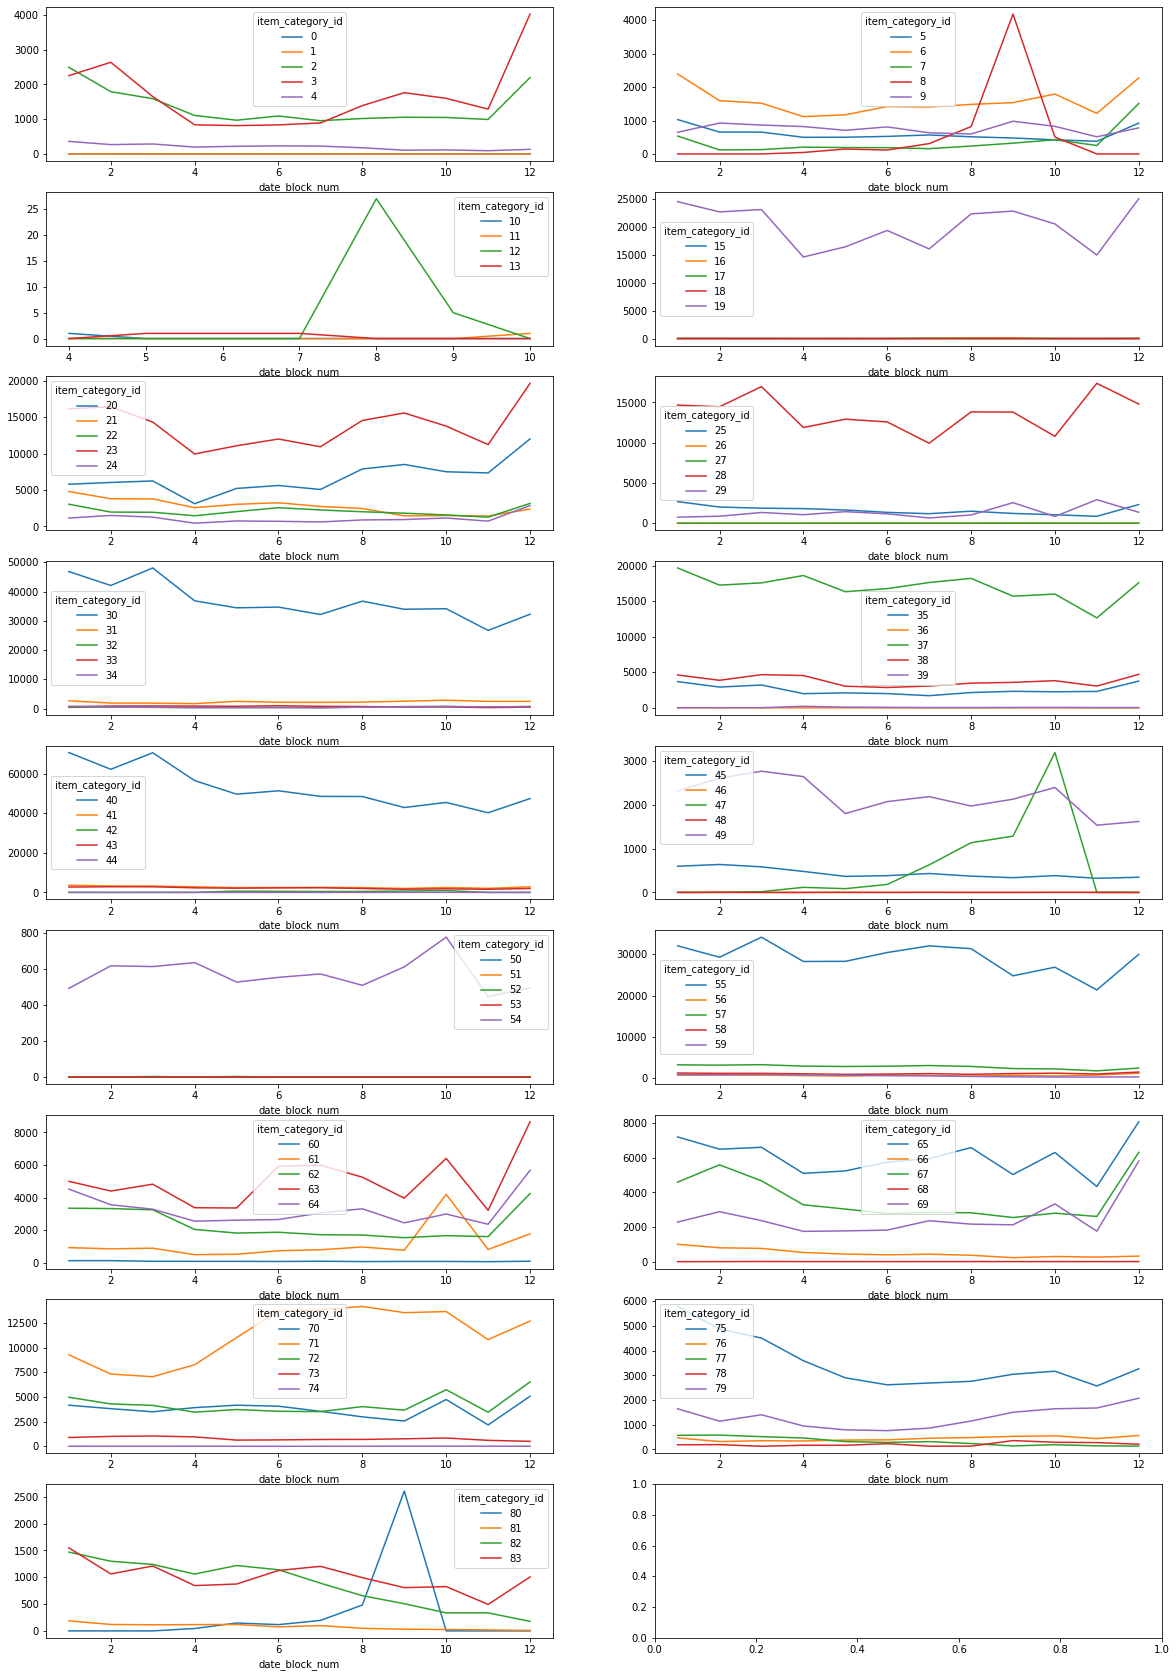

In [130]:
sales_train_month_copy = sales_train_month.copy() # a copy of our df
sales_train_month_copy['date_block_num']=(sales_train_month_copy['date_block_num'] %12)+1 # translate to the natural 12 months
fig, ax = plt.subplots(sharex=False,sharey=False,figsize=(20,30),ncols=2,nrows=9) #subplottinh
counter =0
for i in range(9):
  for j in range(2):
    if i == 8 and j== 1: #skipping the last chart
      continue
    tmp_df = sales_train_month_copy.groupby(['date_block_num','item_category_id'],as_index=False).agg({'item_count_month':['sum']})
    tmp_df.columns=['date_block_num','item_category_id','item_count_month']
    tmp_df =tmp_df.query('item_category_id >= '+str(counter)+ ' and item_category_id <'+str(counter+5))
    counter += 5
    tmp_df_pv =tmp_df.pivot(index='date_block_num',values='item_count_month',columns='item_category_id')
    tmp_df_pv.fillna(0,inplace=True)
    tmp_df_pv.plot(ax=ax[i][j])

In [131]:
tmp_df = sales_train_month.groupby(['item_category_id','month'],as_index=False).agg({'item_count_month':['sum']})
tmp_df.columns=['item_category_id','month','category_month_count']
sales_train_month = sales_train_month.merge(right=tmp_df,how='left')
sales_train_month.head().T

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,32.0,33.0,35.0,43.0,51.0
item_price_mean,221.0,347.0,247.0,221.0,128.5
item_count_month,6.0,3.0,1.0,1.0,2.0
month,1.0,1.0,1.0,1.0,1.0
sum_sales_month_shop,5511.0,5511.0,5511.0,5511.0,5511.0
item_category_id,40.0,37.0,40.0,40.0,57.0
category_month_count,70752.0,19662.0,70752.0,70752.0,3211.0


In [132]:
tmp_df = sales_train_month.groupby(['item_id','month'],as_index=False).agg({'item_count_month':['sum']})
tmp_df.columns=['item_id','month','item_monthly_count']
sales_train_month = sales_train_month.merge(right=tmp_df,how='left')
sales_train_month.head().T

,0,1,2,3,4
date_block_num,0.0,0.0,0.0,0.0,0.0
shop_id,0.0,0.0,0.0,0.0,0.0
item_id,32.0,33.0,35.0,43.0,51.0
item_price_mean,221.0,347.0,247.0,221.0,128.5
item_count_month,6.0,3.0,1.0,1.0,2.0
month,1.0,1.0,1.0,1.0,1.0
sum_sales_month_shop,5511.0,5511.0,5511.0,5511.0,5511.0
item_category_id,40.0,37.0,40.0,40.0,57.0
category_month_count,70752.0,19662.0,70752.0,70752.0,3211.0
item_monthly_count,426.0,122.0,78.0,2.0,27.0


### Adding those items/shops into the dataset which are test set but they are not sold (so item_count_month ==0)

In [133]:
df = pd.DataFrame()
for i in sales_train_month['month'].unique():
  sub_sale=sales_train_month.query('month =='+str(i)).copy()
  sub_sale =sub_sale.merge(test.drop(['ID','date_block_num'],axis=1),how='right',on=['shop_id','item_id'])
  sub_sale.isna().sum()
  index = sub_sale['item_count_month'].index[sub_sale['item_count_month'].apply(np.isnan)]
  sub_sale.loc[index,'month']=i
  sub_sale.loc[index,'date_block_num']=0 # we will remove this feature later
  sub_sale.loc[index,'item_count_month']=0
  sub_total = sales_train_month.groupby(['item_id'],as_index=False).agg({'item_price_mean':['median']}) # instead of price / ietm / shop _> we do proce item independant of shop
  sub_total.columns = ['item_id','item_price_mean_trick1']
  sub_sale.loc[index,'item_price_mean']=sub_total.merge(right=sub_sale.loc[index,:],how='right',on=['item_id'])['item_price_mean_trick1']
  sub_sale['item_price_mean'].fillna(value=sub_sale['item_price_mean'].dropna().mean(),inplace=True) #the average to fill na's 
  #sum_sales_month_shop
  sub_total = sub_sale.dropna().groupby(['shop_id'],as_index=False).agg({'item_count_month':['sum']}) # instead of price / ietm / shop _> we do proce item independant of shop
  sub_total.columns = ['shop_id','sum_sales_month_shop_count']
  sub_sale.loc[index,'sum_sales_month_shop']=sub_total.merge(right=sub_sale.loc[index,:],how='right',on=['shop_id'])['sum_sales_month_shop_count']
  sub_sale['sum_sales_month_shop'].fillna(value=0,inplace=True) #0's to fill na's 
  #item_category_id
  sub_sale.loc[index,'item_category_id']=sub_sale.loc[index,:].drop(['item_category_id'],axis=1).merge(items,how='left',on=['item_id']).copy().set_index(index)['item_category_id']
  # category_month_count
  sub_total = sub_sale.dropna().groupby(['item_category_id'],as_index=False).agg({'item_count_month':['sum']}) # instead of price / ietm / shop _> we do proce item independant of shop
  sub_total.columns = ['item_category_id','sum_sales_cat_count']
  sub_sale.loc[index,'category_month_count']=sub_total.merge(right=sub_sale.loc[index,:],how='right',on=['item_category_id'])['sum_sales_cat_count']
  sub_sale['category_month_count'].fillna(value=0,inplace=True) #0's to fill na's 
  # item_monthly_count
  sub_total = sub_sale.dropna().groupby(['item_id'],as_index=False).agg({'item_count_month':['sum']}) # instead of price / ietm / shop _> we do proce item independant of shop
  sub_total.columns = ['item_id','sum_sales_item_count']
  sub_sale.loc[index,'item_monthly_count']=sub_total.merge(right=sub_sale.loc[index,:],how='right',on=['item_id'])['sum_sales_item_count']
  sub_sale['item_monthly_count'].fillna(value=0,inplace=True) #0's to fill na's 
  print (sub_sale.isna().sum())
  df=df.append(sub_sale)


date_block_num          0
shop_id                 0
item_id                 0
item_price_mean         0
item_count_month        0
month                   0
sum_sales_month_shop    0
item_category_id        0
category_month_count    0
item_monthly_count      0
dtype: int64
date_block_num          0
shop_id                 0
item_id                 0
item_price_mean         0
item_count_month        0
month                   0
sum_sales_month_shop    0
item_category_id        0
category_month_count    0
item_monthly_count      0
dtype: int64
date_block_num          0
shop_id                 0
item_id                 0
item_price_mean         0
item_count_month        0
month                   0
sum_sales_month_shop    0
item_category_id        0
category_month_count    0
item_monthly_count      0
dtype: int64
date_block_num          0
shop_id                 0
item_id                 0
item_price_mean         0
item_count_month        0
month                   0
sum_sales_month_shop    0

In [134]:
print(df.shape)
print(sales_train_month.shape)

(2686808, 10)
(1565778, 10)


In [0]:
train_ds=df.copy()
train_ds['1_month_item_cnt']=0
train_ds['2_month_item_cnt']=0
train_ds['3_month_item_cnt']=0


In [0]:
train_ds.loc[:,'1_month_item_cnt']=df.sort_values('month').reset_index()['item_count_month'].shift(1,fill_value=0)
train_ds.loc[:,'2_month_item_cnt']=df.sort_values('month').reset_index()['item_count_month'].shift(2,fill_value=0)
train_ds.loc[:,'3_month_item_cnt']=df.sort_values('month').reset_index()['item_count_month'].shift(3,fill_value=0)

In [137]:
train_ds.head().T

,0,1,2,3,4
date_block_num,0.0,12.0,0.0,0.0,12.0
shop_id,2.0,2.0,2.0,2.0,2.0
item_id,33.0,33.0,491.0,1007.0,1007.0
item_price_mean,499.0,199.0,600.0,449.0,599.0
item_count_month,1.0,1.0,1.0,3.0,1.0
month,1.0,1.0,1.0,1.0,1.0
sum_sales_month_shop,2894.0,2894.0,2894.0,2894.0,2894.0
item_category_id,37.0,37.0,73.0,67.0,67.0
category_month_count,19662.0,19662.0,890.0,4596.0,4596.0
item_monthly_count,122.0,122.0,80.0,127.0,127.0


## Mean(ish) encoding

In [0]:
# shop_id
tmp_df = train_ds.groupby(['shop_id'],as_index=False).agg({'item_count_month':['sum','mean']})
tmp_df.columns=['shop_id','shop_id_sum','shop_id_mean']
train_ds['shop_id_sum']=train_ds.merge(right=tmp_df,on=['shop_id'],how='left')['shop_id_sum']
train_ds['shop_id_mean']=train_ds.merge(right=tmp_df,on=['shop_id'],how='left')['shop_id_mean']
# item_id
tmp_df = train_ds.groupby(['item_id'],as_index=False).agg({'item_count_month':['sum','mean']})
tmp_df.columns=['item_id','item_id_sum','item_id_mean']
train_ds['item_id_sum']=train_ds.merge(right=tmp_df,on=['item_id'],how='left')['item_id_sum']
train_ds['item_id_mean']=train_ds.merge(right=tmp_df,on=['item_id'],how='left')['item_id_mean']

In [0]:
index_remove = train_ds.query('item_count_month >20').index
train_ds.drop(index_remove,axis=0,inplace=True)

In [143]:
train_ds.head().T

,0,1,2,3,4
date_block_num,0.000000,12.000000,0.000000,0.000000,12.000000
shop_id,2.000000,2.000000,2.000000,2.000000,2.000000
item_id,33.000000,33.000000,491.000000,1007.000000,1007.000000
item_price_mean,499.000000,199.000000,600.000000,449.000000,599.000000
item_count_month,1.000000,1.000000,1.000000,3.000000,1.000000
month,1.000000,1.000000,1.000000,1.000000,1.000000
sum_sales_month_shop,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
item_category_id,37.000000,37.000000,73.000000,67.000000,67.000000
category_month_count,19662.000000,19662.000000,890.000000,4596.000000,4596.000000
item_monthly_count,122.000000,122.000000,80.000000,127.000000,127.000000


## Preparing the TEST dataset

In [144]:
test['month']=(test['date_block_num']%12)+1
# item_price_mean
temp_df = train_ds.groupby(['shop_id','item_id','month'],as_index=False).agg({'item_price_mean':['mean']})
temp_df.columns=['shop_id','item_id','month','item_price_mean']
test['item_price_mean']=test.merge(temp_df,on=['shop_id','item_id','month'],how='left')['item_price_mean']
# sum_sales_month_shop
temp_df = train_ds.groupby(['shop_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['shop_id','month','sum_sales_month_shop']
test['sum_sales_month_shop']=test.merge(temp_df,on=['shop_id','month'],how='left')['sum_sales_month_shop']
# category_month_count
test['item_category_id']=test.merge(items,on=['item_id'],how='left')['item_category_id']
temp_df = train_ds.groupby(['item_category_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['item_category_id','month','sum_cat_month_shop']
test['category_month_count']=test.merge(temp_df,on=['item_category_id','month'],how='left')['sum_cat_month_shop']
test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
month,11.0,11.0,11.0,11.0,11.0
item_price_mean,2599.0,98.0,98.0,450.0,450.0
sum_sales_month_shop,1045.0,1045.0,1045.0,1045.0,1045.0
item_category_id,19.0,55.0,19.0,23.0,20.0
category_month_count,5177.0,9863.0,5177.0,4561.0,3191.0


In [145]:
# item_monthly_count
temp_df = train_ds.groupby(['item_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['item_id','month','item_monthly_count']
test['item_monthly_count']=test.merge(temp_df,on=['item_id','month'],how='left')['item_monthly_count']
test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
month,11.0,11.0,11.0,11.0,11.0
item_price_mean,2599.0,98.0,98.0,450.0,450.0
sum_sales_month_shop,1045.0,1045.0,1045.0,1045.0,1045.0
item_category_id,19.0,55.0,19.0,23.0,20.0
category_month_count,5177.0,9863.0,5177.0,4561.0,3191.0
item_monthly_count,52.0,0.0,0.0,0.0,0.0


In [146]:
# 1_month_item_cnt
temp_df = train_ds.groupby(['shop_id','item_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['shop_id','item_id','month','1_month_item_cnt']
temp_df['month'] = temp_df['month']+1
test['1_month_item_cnt']=test.merge(temp_df,on=['shop_id','item_id','month'],how='left')['1_month_item_cnt']
test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
month,11.0,11.0,11.0,11.0,11.0
item_price_mean,2599.0,98.0,98.0,450.0,450.0
sum_sales_month_shop,1045.0,1045.0,1045.0,1045.0,1045.0
item_category_id,19.0,55.0,19.0,23.0,20.0
category_month_count,5177.0,9863.0,5177.0,4561.0,3191.0
item_monthly_count,52.0,0.0,0.0,0.0,0.0


In [147]:
# 2_month_item_cnt
temp_df = train_ds.groupby(['shop_id','item_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['shop_id','item_id','month','2_month_item_cnt']
temp_df['month'] = temp_df['month']+2
test['2_month_item_cnt']=test.merge(temp_df,on=['shop_id','item_id','month'],how='left')['2_month_item_cnt']
test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
month,11.0,11.0,11.0,11.0,11.0
item_price_mean,2599.0,98.0,98.0,450.0,450.0
sum_sales_month_shop,1045.0,1045.0,1045.0,1045.0,1045.0
item_category_id,19.0,55.0,19.0,23.0,20.0
category_month_count,5177.0,9863.0,5177.0,4561.0,3191.0
item_monthly_count,52.0,0.0,0.0,0.0,0.0


In [148]:
# 3_month_item_cnt
temp_df = train_ds.groupby(['shop_id','item_id','month'],as_index=False).agg({'item_count_month':['sum']})
temp_df.columns=['shop_id','item_id','month','3_month_item_cnt']
temp_df['month'] = temp_df['month']+3
test['3_month_item_cnt']=test.merge(temp_df,on=['shop_id','item_id','month'],how='left')['3_month_item_cnt']
test.head().T

,0,1,2,3,4
ID,0.0,1.0,2.0,3.0,4.0
shop_id,5.0,5.0,5.0,5.0,5.0
item_id,5037.0,5320.0,5233.0,5232.0,5268.0
date_block_num,34.0,34.0,34.0,34.0,34.0
month,11.0,11.0,11.0,11.0,11.0
item_price_mean,2599.0,98.0,98.0,450.0,450.0
sum_sales_month_shop,1045.0,1045.0,1045.0,1045.0,1045.0
item_category_id,19.0,55.0,19.0,23.0,20.0
category_month_count,5177.0,9863.0,5177.0,4561.0,3191.0
item_monthly_count,52.0,0.0,0.0,0.0,0.0


In [149]:
# shop_id_sum
temp_df = train_ds.groupby(['shop_id'],as_index=False).agg({'item_count_month':['sum','mean']})
temp_df.columns = ['shop_id','shop_id_sum','shop_id_mean']
test['shop_id_sum']=test.merge(temp_df,on=['shop_id'],how='left')['shop_id_sum']
test['shop_id_mean']=test.merge(temp_df,on=['shop_id'],how='left')['shop_id_mean']
test.head().T

,0,1,2,3,4
ID,0.000000,1.000000,2.000000,3.000000,4.000000
shop_id,5.000000,5.000000,5.000000,5.000000,5.000000
item_id,5037.000000,5320.000000,5233.000000,5232.000000,5268.000000
date_block_num,34.000000,34.000000,34.000000,34.000000,34.000000
month,11.000000,11.000000,11.000000,11.000000,11.000000
item_price_mean,2599.000000,98.000000,98.000000,450.000000,450.000000
sum_sales_month_shop,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
item_category_id,19.000000,55.000000,19.000000,23.000000,20.000000
category_month_count,5177.000000,9863.000000,5177.000000,4561.000000,3191.000000
item_monthly_count,52.000000,0.000000,0.000000,0.000000,0.000000


In [150]:
# item_id
temp_df = train_ds.groupby(['item_id'],as_index=False).agg({'item_count_month':['sum','mean']})
temp_df.columns = ['item_id','item_id_sum','item_id_mean']
test['item_id_sum']=test.merge(temp_df,on=['item_id'],how='left')['item_id_sum']
test['item_id_mean']=test.merge(temp_df,on=['item_id'],how='left')['item_id_mean']
test.head().T

,0,1,2,3,4
ID,0.000000,1.000000,2.000000,3.000000,4.000000
shop_id,5.000000,5.000000,5.000000,5.000000,5.000000
item_id,5037.000000,5320.000000,5233.000000,5232.000000,5268.000000
date_block_num,34.000000,34.000000,34.000000,34.000000,34.000000
month,11.000000,11.000000,11.000000,11.000000,11.000000
item_price_mean,2599.000000,98.000000,98.000000,450.000000,450.000000
sum_sales_month_shop,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
item_category_id,19.000000,55.000000,19.000000,23.000000,20.000000
category_month_count,5177.000000,9863.000000,5177.000000,4561.000000,3191.000000
item_monthly_count,52.000000,0.000000,0.000000,0.000000,0.000000


In [151]:
train_ds.head().T

,0,1,2,3,4
date_block_num,0.000000,12.000000,0.000000,0.000000,12.000000
shop_id,2.000000,2.000000,2.000000,2.000000,2.000000
item_id,33.000000,33.000000,491.000000,1007.000000,1007.000000
item_price_mean,499.000000,199.000000,600.000000,449.000000,599.000000
item_count_month,1.000000,1.000000,1.000000,3.000000,1.000000
month,1.000000,1.000000,1.000000,1.000000,1.000000
sum_sales_month_shop,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
item_category_id,37.000000,37.000000,73.000000,67.000000,67.000000
category_month_count,19662.000000,19662.000000,890.000000,4596.000000,4596.000000
item_monthly_count,122.000000,122.000000,80.000000,127.000000,127.000000


In [152]:
train_ds.drop(['date_block_num','shop_id','item_id','item_category_id'],axis=1,inplace=True)
train_ds.head().T

,0,1,2,3,4
item_price_mean,499.000000,199.000000,600.000000,449.000000,599.000000
item_count_month,1.000000,1.000000,1.000000,3.000000,1.000000
month,1.000000,1.000000,1.000000,1.000000,1.000000
sum_sales_month_shop,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
category_month_count,19662.000000,19662.000000,890.000000,4596.000000,4596.000000
item_monthly_count,122.000000,122.000000,80.000000,127.000000,127.000000
1_month_item_cnt,0.000000,1.000000,0.000000,0.000000,0.000000
2_month_item_cnt,0.000000,0.000000,1.000000,0.000000,0.000000
3_month_item_cnt,0.000000,0.000000,0.000000,1.000000,0.000000
shop_id_sum,17293.000000,17293.000000,17293.000000,17293.000000,17293.000000


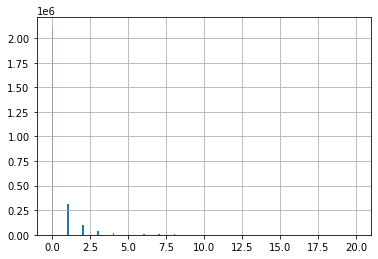

In [153]:
train_ds['item_count_month'].hist(bins=200)

In [154]:
Y = train_ds['item_count_month']
train_ds.drop(['item_count_month'],axis=1,inplace=True)
train_ds.head().T

,0,1,2,3,4
item_price_mean,499.000000,199.000000,600.000000,449.000000,599.000000
month,1.000000,1.000000,1.000000,1.000000,1.000000
sum_sales_month_shop,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
category_month_count,19662.000000,19662.000000,890.000000,4596.000000,4596.000000
item_monthly_count,122.000000,122.000000,80.000000,127.000000,127.000000
1_month_item_cnt,0.000000,1.000000,0.000000,0.000000,0.000000
2_month_item_cnt,0.000000,0.000000,1.000000,0.000000,0.000000
3_month_item_cnt,0.000000,0.000000,0.000000,1.000000,0.000000
shop_id_sum,17293.000000,17293.000000,17293.000000,17293.000000,17293.000000
shop_id_mean,0.276454,0.276454,0.276454,0.276454,0.276454


In [0]:
EPOCHS = 50
BATCH_SIZE = 1000
VERBOSE = 1
NB_CLASSES = 1  # number of outputs = number of digits
N_HIDDEN = 200
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.2
RESHAPED = train_ds.shape[1] # number of features

In [0]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [157]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
         input_shape=(RESHAPED,),
         name='dense_layer', activation='sigmoid'))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
         name='dense_layer_2', activation='sigmoid'))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
         name='dense_layer_3', activation='sigmoid'))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
         name='dense_layer_4', activation='sigmoid'))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
         name='dense_layer_5', activation='relu'))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
         name='dense_layer_6', activation='linear'))
# Summary of the model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 200)               2600      
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 200)               40200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 200)              

In [0]:
# Compiling the model.
model.compile(optimizer='RMSProp',
             loss='mse',
             metrics=['mse','mape','accuracy'])

In [159]:
# Training the model.
model.fit(train_ds, Y,
         batch_size=BATCH_SIZE, epochs=EPOCHS,
         verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
          callbacks=[keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)])
model.save('/content/drive/My Drive/colab/kaggle_future_sale/my_model') 

Epoch 1/50
2102/2102 [==============================] - 76s 36ms/step - loss: 1.4721 - mse: 1.4721 - mape: 235039696.0000 - accuracy: 0.7331 - val_loss: 1.4929 - val_mse: 1.4929 - val_mape: 201591072.0000 - val_accuracy: 0.7746
Epoch 2/50
2102/2102 [==============================] - 79s 38ms/step - loss: 1.4052 - mse: 1.4052 - mape: 201205312.0000 - accuracy: 0.7458 - val_loss: 1.4719 - val_mse: 1.4719 - val_mape: 210216032.0000 - val_accuracy: 0.7587
Epoch 3/50
2102/2102 [==============================] - 77s 37ms/step - loss: 1.3993 - mse: 1.3993 - mape: 198064848.0000 - accuracy: 0.7489 - val_loss: 1.5186 - val_mse: 1.5186 - val_mape: 242656256.0000 - val_accuracy: 0.7454
Epoch 4/50
2102/2102 [==============================] - 76s 36ms/step - loss: 1.4030 - mse: 1.4030 - mape: 200157088.0000 - accuracy: 0.7461 - val_loss: 1.4793 - val_mse: 1.4793 - val_mape: 217297280.0000 - val_accuracy: 0.7528
Epoch 5/50
2102/2102 [==============================] - 77s 37ms/step - loss: 1.4000 - m

In [164]:
train_ds.head().T

,0,1,2,3,4
item_price_mean,499.000000,199.000000,600.000000,449.000000,599.000000
month,1.000000,1.000000,1.000000,1.000000,1.000000
sum_sales_month_shop,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000
category_month_count,19662.000000,19662.000000,890.000000,4596.000000,4596.000000
item_monthly_count,122.000000,122.000000,80.000000,127.000000,127.000000
1_month_item_cnt,0.000000,1.000000,0.000000,0.000000,0.000000
2_month_item_cnt,0.000000,0.000000,1.000000,0.000000,0.000000
3_month_item_cnt,0.000000,0.000000,0.000000,1.000000,0.000000
shop_id_sum,17293.000000,17293.000000,17293.000000,17293.000000,17293.000000
shop_id_mean,0.276454,0.276454,0.276454,0.276454,0.276454


In [165]:
test_ds=test.drop(['ID','shop_id','item_id','date_block_num','item_category_id'],axis=1).copy()
test_ds.head().T

,0,1,2,3,4
month,11.000000,11.000000,11.000000,11.000000,11.000000
item_price_mean,2599.000000,98.000000,98.000000,450.000000,450.000000
sum_sales_month_shop,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
category_month_count,5177.000000,9863.000000,5177.000000,4561.000000,3191.000000
item_monthly_count,52.000000,0.000000,0.000000,0.000000,0.000000
1_month_item_cnt,0.000000,0.000000,1.000000,0.000000,0.000000
2_month_item_cnt,2.000000,0.000000,3.000000,0.000000,0.000000
3_month_item_cnt,3.000000,0.000000,1.000000,1.000000,0.000000
shop_id_sum,18416.000000,18416.000000,18416.000000,18416.000000,18416.000000
shop_id_mean,0.301916,0.301916,0.301916,0.301916,0.301916


In [0]:
results = model.predict(test_ds)

In [202]:
any(np.isnan(results))

True

In [0]:
submission.loc[:,'item_cnt_month']=list(results)

In [0]:
submission.fillna(submission['item_cnt_month'].dropna().median(),inplace=True)

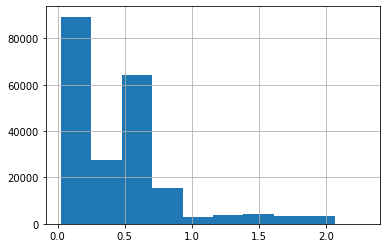

In [205]:
# submission['item_cnt_month'] = submission['item_cnt_month'].clip(0,20)
submission['item_cnt_month'].hist()

In [175]:
len(results)

214200

In [0]:
from google.colab import files
submission.to_csv('submission_113.csv',sep=',',index=False) 
files.download('submission_113.csv')

In [0]:
from sklearn import ensemble
gb = ensemble.GradientBoostingRegressor(n_estimators=10)

In [134]:
len(train_ds.columns)

17

In [135]:
gb.fit(train_ds.drop(['item_count_month'],axis=1), train_ds['item_count_month'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x7f0628691978>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16')])

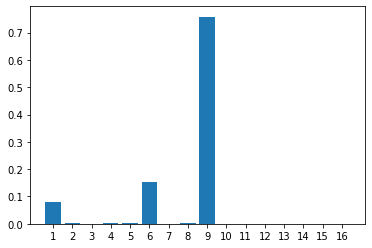

In [136]:
plt.bar(range(train_ds.drop(['item_count_month'],axis=1).shape[1]), gb.feature_importances_)
plt.xticks(range(train_ds.drop(['item_count_month'],axis=1).shape[1]), ['1','2','3','4',
                                                                                 '5','6','7',
                                                                                 '8','9','10','11','12','13','14','15','16'])

In [54]:
gb.feature_importances_

array([0.0211514 , 0.        , 0.        , 0.        , 0.001945  ,
       0.17375186, 0.        , 0.        , 0.80315174])